# TASK-3
Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

## IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import os
import zipfile
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tqdm import tqdm
import plotly.express as px
import random
from PIL import Image
import plotly.graph_objects as go
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

## Dataset 

In [2]:
# Define the path to the ZIP file
zip_file_path = 'C:\\Users\\Hp\\Downloads\\train.zip'

# Define the extraction directory
extract_to = 'C:\\Users\\Hp\\Downloads'

# Create the extraction directory if it does not exist
os.makedirs(extract_to, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")


Extraction complete.


In [3]:
# Define the path to the ZIP file
zip_file_path = 'C:\\Users\\Hp\\Downloads\\test1.zip'

# Define the extraction directory
extract_to = 'C:\\Users\\Hp\\Downloads'

# Create the extraction directory if it does not exist
os.makedirs(extract_to, exist_ok=True)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")


Extraction complete.


This code defines a function called `load_images` that loads and processes images from a specified folder.
The function resizes the images, normalizes the pixel values, and assigns labels based on the filename. 

### Function Definition
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
- `folder`: The path to the folder containing the images.
- `img_size`: A tuple specifying the size to which each image should be resized. Default is (64, 64).
- `sample_count`: The number of images to load. Default is 20.
- `label_filter`: A string to filter filenames. Only files containing this string in their name will be considered. 
    Default is `None`.

### Initialization
    images = []
    labels = []
    filenames = os.listdir(folder)
- `images`: An empty list to store the processed images.
- `labels`: An empty list to store the labels for the images.
- `filenames`: A list of all filenames in the specified folder.

### Filename Filtering
    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]
- If `label_filter` is provided, it filters the filenames to include only those containing the `label_filter` string.

### Random Shuffle
    random.shuffle(filenames)
- Randomly shuffles the filenames to ensure that a random sample of images is loaded.

### Image Processing Loop
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")

            - Iterates over the first `sample_count` filenames.
- Tries to open each image file and perform the following steps:
  - Constructs the full path to the image.
  - Opens the image using the Pillow library (`Image.open`).
  - Resizes the image to the specified size (`img_size`).
  - Converts the image to a NumPy array and normalizes pixel values to the range [0, 1] by dividing by 255.0.
  - Appends the processed image to the `images` list.
  - Assigns a label based on the filename: `0` if the filename contains 'cat', otherwise `1`.
- If an error occurs while processing an image, it prints an error message and continues with the next image.

### Return Processed Data
    return np.array(images), np.array(labels)
- Converts the `images` and `labels` lists to NumPy arrays and returns them.

In [4]:
def load_images(folder, img_size=(64, 64), sample_count=20, label_filter=None):
    images = []
    labels = []
    filenames = os.listdir(folder)
    
    if label_filter is not None:
        filenames = [fname for fname in filenames if label_filter in fname]
    
    random.shuffle(filenames)
    for img in filenames[:sample_count]:
        try:
            img_path = os.path.join(folder, img)
            img_pil = Image.open(img_path)
            img_pil = img_pil.resize(img_size)
            img_np = np.array(img_pil) / 255.0  # Normalize pixel values
            images.append(img_np)
            labels.append(0 if 'cat' in img else 1)
        except Exception as e:
            print(f"Error loading image {img}: {e}")
    
    return np.array(images), np.array(labels)

# ### Function Definition
def visualize_images(images, labels, sample_count=20):
- `images`: A NumPy array containing the images to be visualized.
- `labels`: A NumPy array containing the labels for the images.
- `sample_count`: The number of images to display. Default is 20.

### Setting Up the Plot
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()
- `fig, axes = plt.subplots(4, 5, figsize=(15, 12))`:
  - Creates a figure (`fig`) and a 4x5 grid of subplots (`axes`) using Matplotlib.
  - `figsize=(15, 12)` specifies the size of the entire figure in inches (width, height).
- `axes = axes.flatten()`:
  - Flattens the 2D array of subplots into a 1D array for easier indexing.

### Plotting Images
    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')
- Iterates over the first `sample_count` images and labels.
- For each image and label:
  - `axes[i].imshow(images[i])`: Displays the image in the `i`-th subplot.
  - `axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')`: Sets the title of the subplot to 'Cat' if the label is `0`, 
    otherwise to 'Dog'.
  - `axes[i].axis('off')`: Turns off the axis lines and labels for the subplot to give a cleaner look.

### Displaying the Plot
    plt.tight_layout()
    plt.show()
- `plt.tight_layout()`: Adjusts the layout of the subplots to minimize overlap and make the plot look nicer.
- `plt.show()`: Displays the figure with all the subplots.


In [5]:
def visualize_images(images, labels, sample_count=20):
    fig, axes = plt.subplots(4, 5, figsize=(15, 12))
    axes = axes.flatten()
    
    for i in range(sample_count):
        axes[i].imshow(images[i])
        axes[i].set_title('Cat' if labels[i] == 0 else 'Dog')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

## Setting up paths 

In [6]:
train_dir = 'C:\\Users\\Hp\\Downloads\\train'
test_dir = 'C:\\Users\\Hp\\Downloads\\test1'

## loading and visualizing cat and dog images respectively 

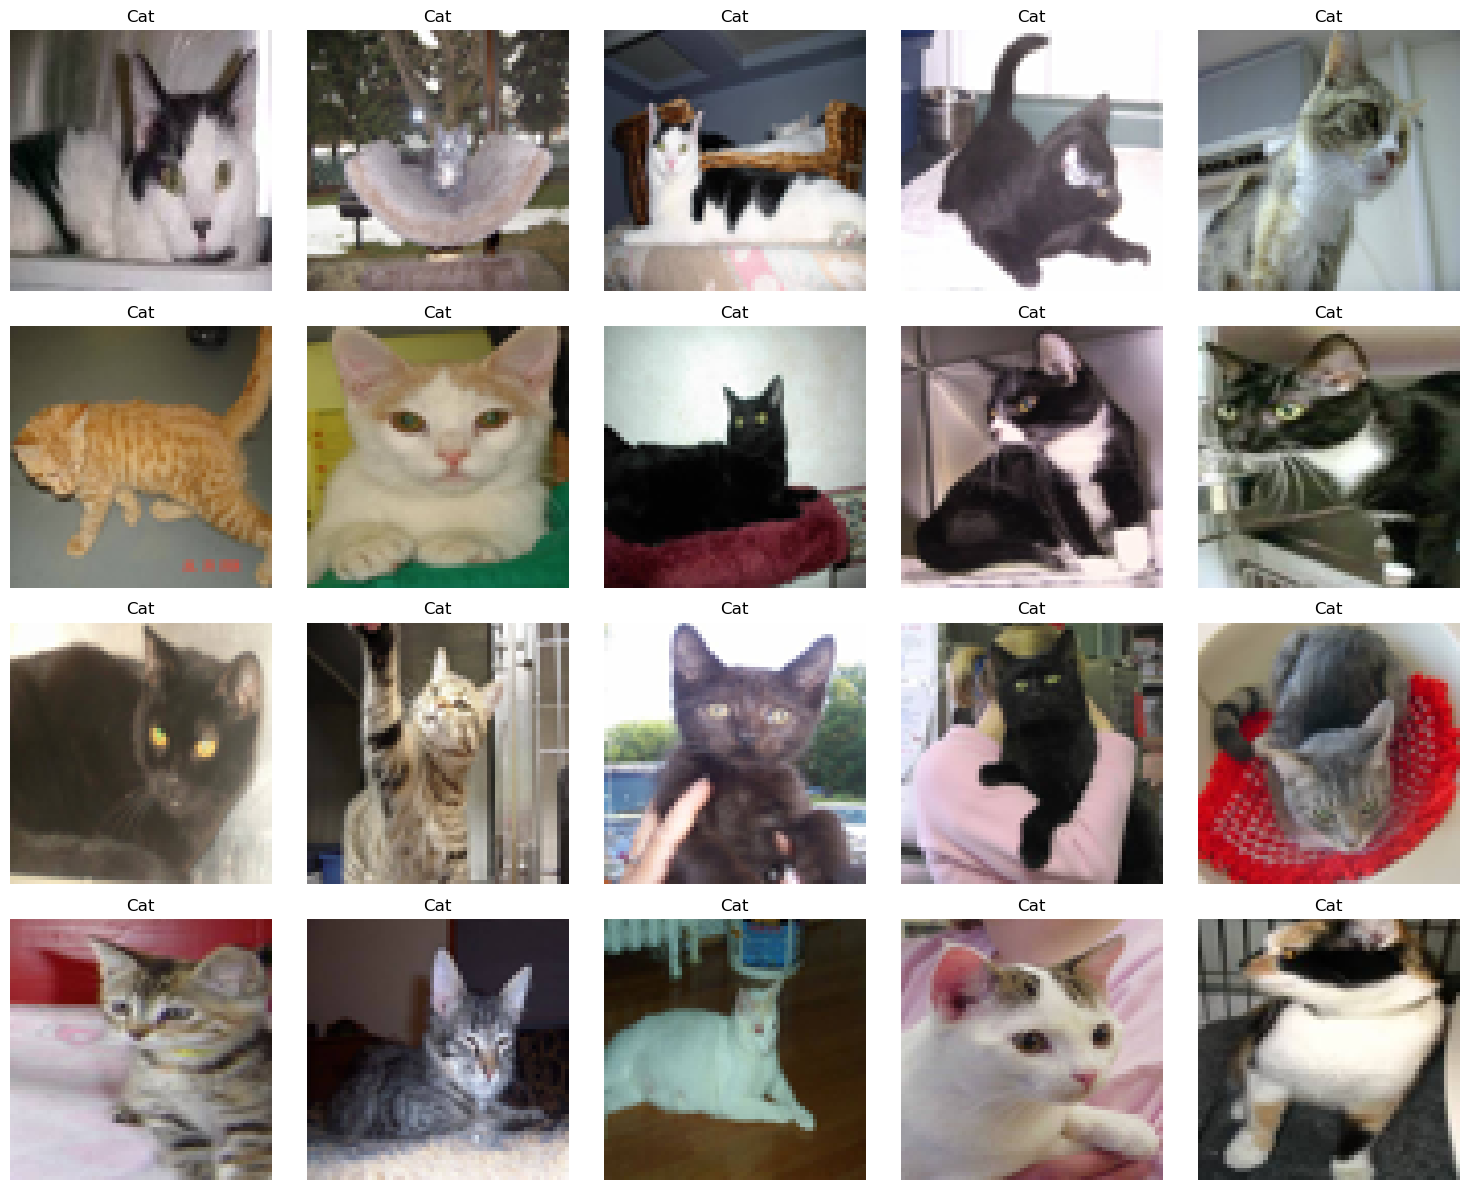

In [7]:
cat_images, cat_labels = load_images(train_dir, sample_count=20, label_filter='cat')
visualize_images(cat_images, cat_labels, sample_count=20)

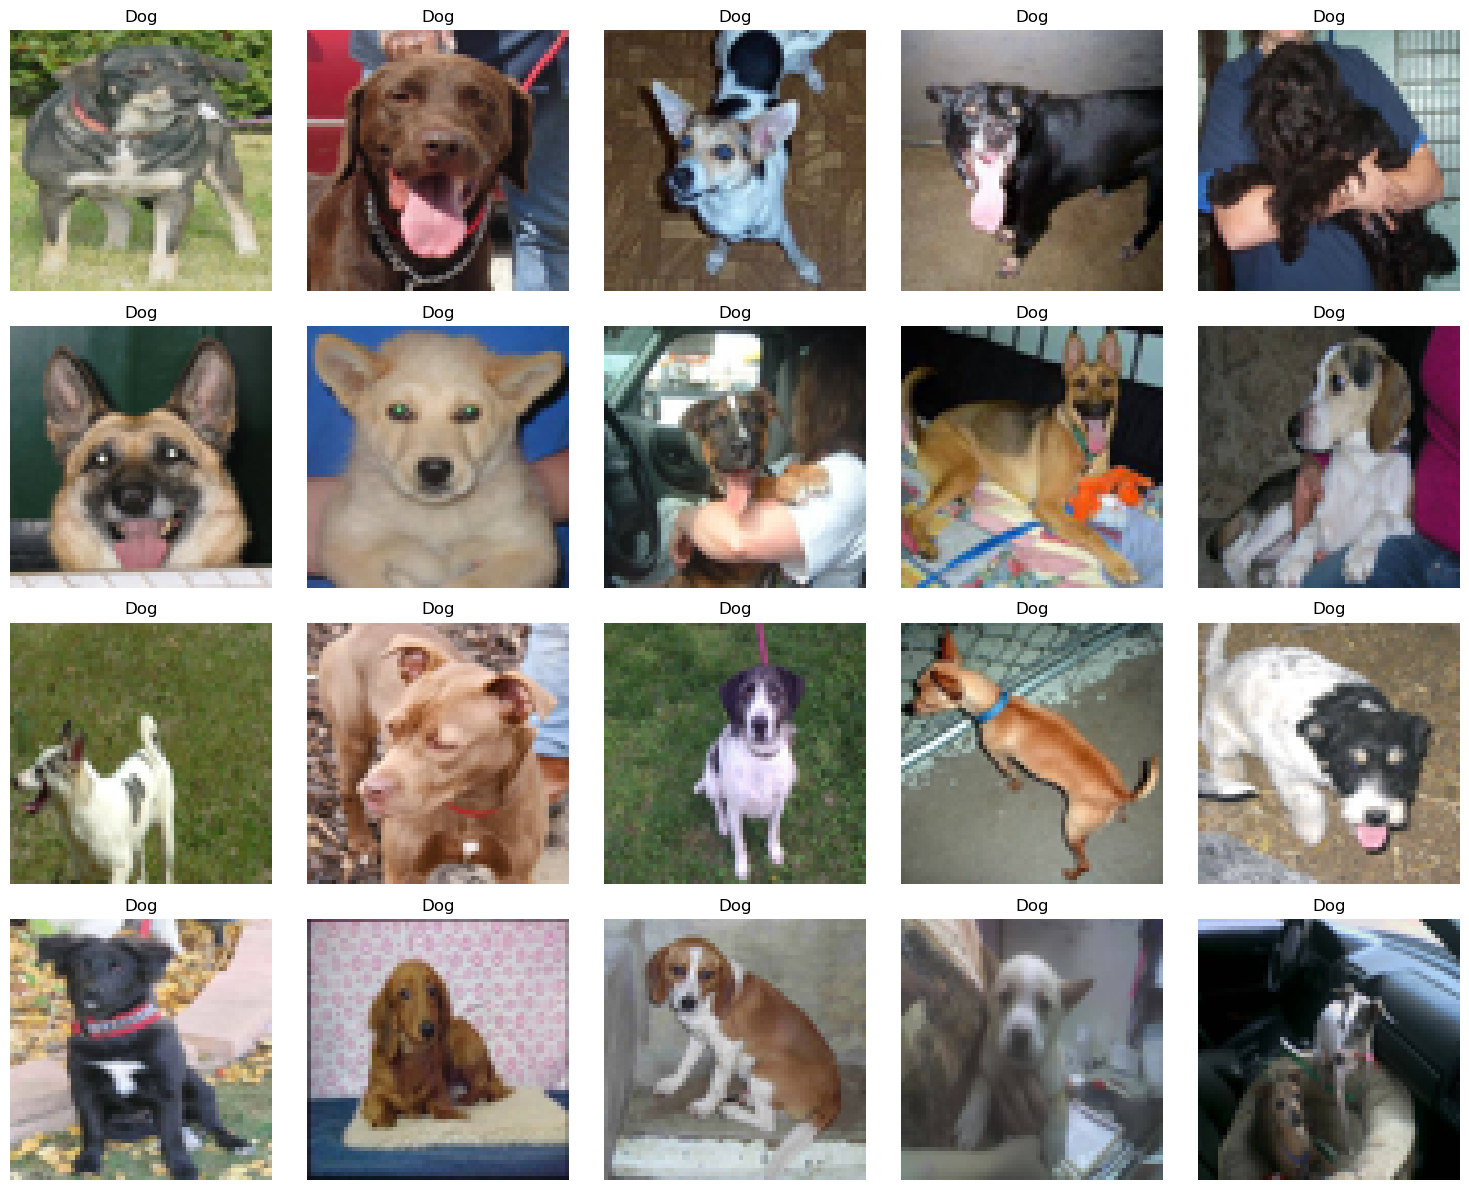

In [8]:
#Load and visualize dog images¶
dog_images, dog_labels = load_images(train_dir, sample_count=20, label_filter='dog')
visualize_images(dog_images, dog_labels, sample_count=20)

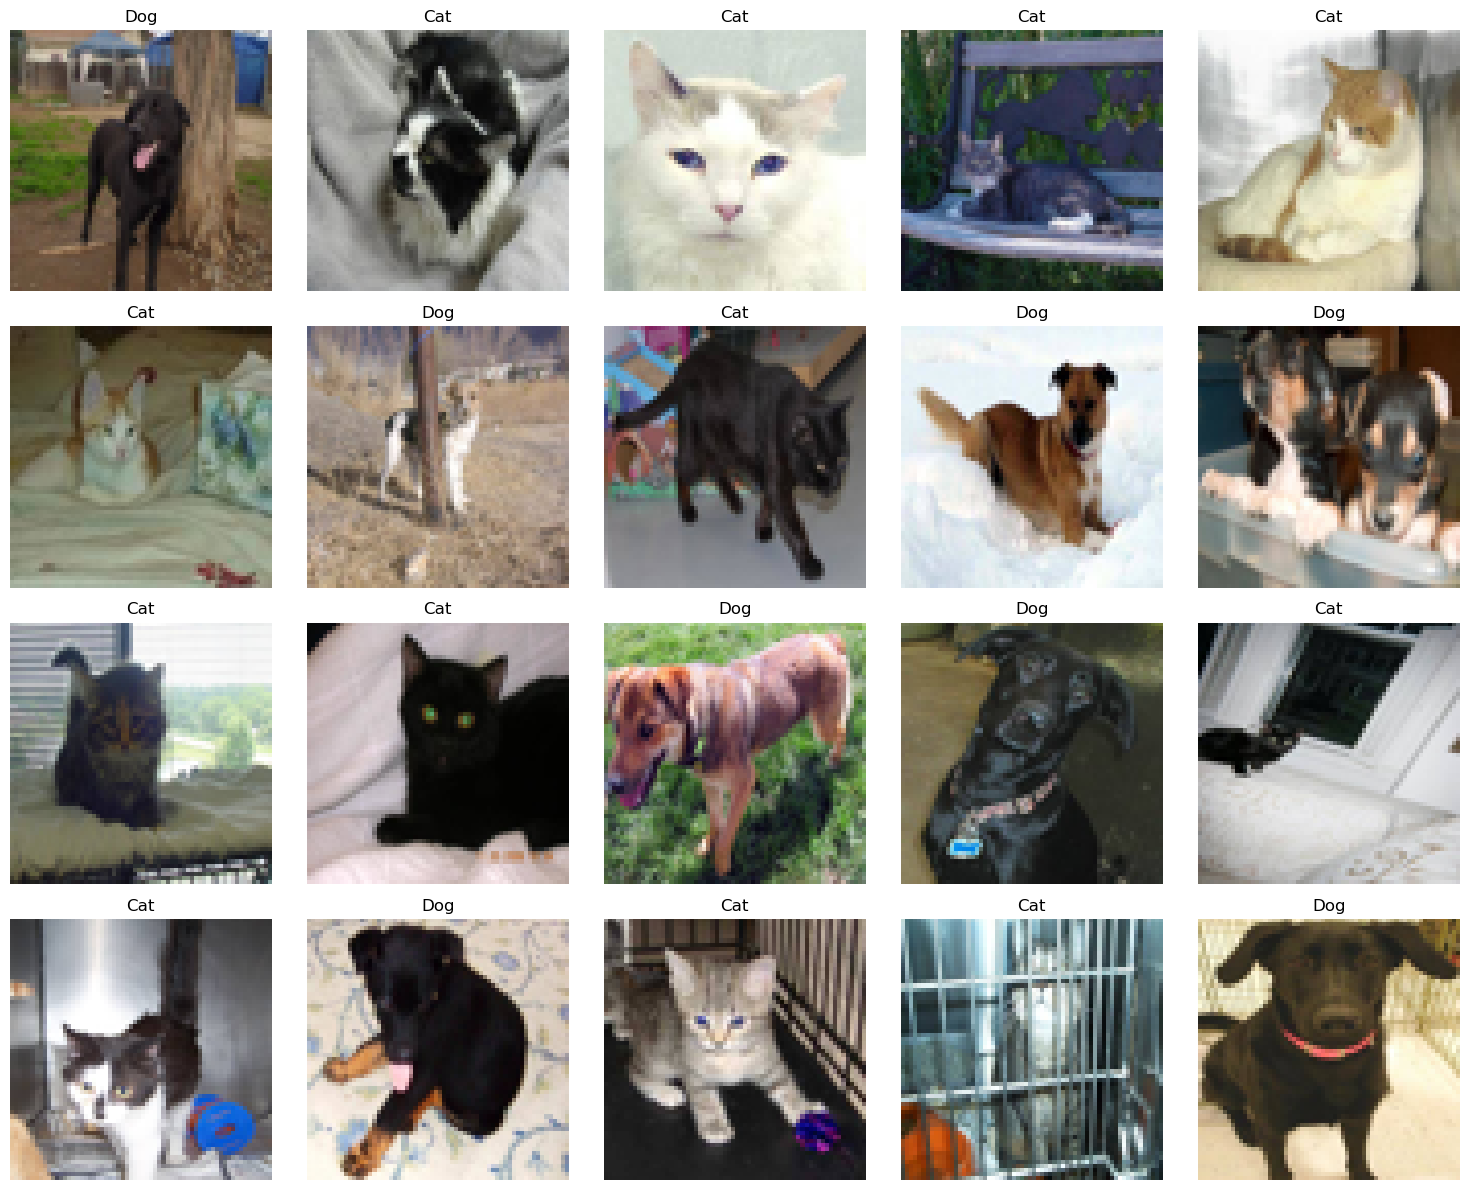

In [9]:
#Load and visualize both cat and dog images
all_images, all_labels = load_images(train_dir, sample_count=20)
visualize_images(all_images, all_labels, sample_count=20)

## Loading and preprocessing the training data

## normalizing the data 

In [10]:
images, labels = load_images(train_dir, sample_count=10000) 
images = images / 255.0

In [11]:
#Display the shape of the images array
print("Shape of images array:", images.shape)

Shape of images array: (10000, 64, 64, 3)


In [12]:
#Display the shape of the first image
print("Shape of the first image:", images[0].shape)

Shape of the first image: (64, 64, 3)


In [13]:
#Flattening the images for the SVM input
n_samples, img_height, img_width, img_channels = images.shape
images_flat = images.reshape(n_samples, -1)

In [14]:
#Standardizing the features
scaler = StandardScaler()
images_flat_scaled = scaler.fit_transform(images_flat)

# Applying t-SNE

In [15]:
perplexity = min(30, n_samples - 1)
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
images_tsne = tsne.fit_transform(images_flat_scaled)

C:\Users\Hp\Downloads\mukul\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\Downloads\mukul\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


# train test split

In [16]:
X_train, X_val, y_train, y_val = train_test_split(images_flat_scaled, labels, test_size=0.2, random_state=42)

In [17]:
X_train

array([[ 0.03143032,  0.12512844,  0.15333039, ..., -0.30874744,
        -0.17283329,  0.03778501],
       [ 1.93829693,  2.02009342,  2.084852  , ...,  0.46944212,
         0.89402958,  0.03778501],
       [-1.30194256, -1.37927124, -1.15784852, ..., -1.33654498,
        -1.2998011 , -0.98354976],
       ...,
       [ 0.66227341,  0.74713985,  0.7595744 , ..., -0.63176953,
        -0.54848922, -0.45829188],
       [-0.08326842,  0.11066306,  0.26611997, ...,  0.17578568,
         0.23287513,  0.5046809 ],
       [ 0.92034558,  0.93518981,  0.68908091, ...,  1.36509426,
         1.43497413,  1.35092971]])

# class distribution visualization 

In [18]:
#Checking class distribution
unique, counts = np.unique(labels, return_counts=True)
print(f"Class distribution: {dict(zip(unique, counts))}")

Class distribution: {0: 4958, 1: 5042}


In [19]:
def plot_tsne_data(tsne_data, labels, title):
    df_tsne = pd.DataFrame()
    df_tsne['X'] = tsne_data[:, 0]
    df_tsne['Y'] = tsne_data[:, 1]
    df_tsne['Label'] = labels
    df_tsne['Label'] = df_tsne['Label'].map({0: 'Cat', 1: 'Dog'})
    
    fig = px.scatter(df_tsne, x='X', y='Y', color='Label', title=title)
    fig.show()

plot_tsne_data(images_tsne, labels, 't-SNE visualization of Cats vs Dogs')

# Support Vector Machine Algorithm

In [20]:
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#Making predictions on the validation set
y_val_pred = svm.predict(X_val)

In [22]:
y_val_pred

array([0, 1, 1, ..., 0, 1, 1])

# Evaluating the model

In [23]:
val_accuracy = accuracy_score(y_val, y_val_pred)
val_class_report = classification_report(y_val, y_val_pred, target_names=['Cat', 'Dog'])
val_conf_matrix = confusion_matrix(y_val, y_val_pred)
#Accuracy
print(f'Validation Accuracy: {val_accuracy:.4f}')

Validation Accuracy: 0.5480


# Classification Report

In [24]:
print('Validation Classification Report:')
print(val_class_report)

Validation Classification Report:
              precision    recall  f1-score   support

         Cat       0.54      0.56      0.55       988
         Dog       0.56      0.53      0.54      1012

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



# Confusion Matrix

Confusion Matrix:
[[557 431]
 [473 539]]


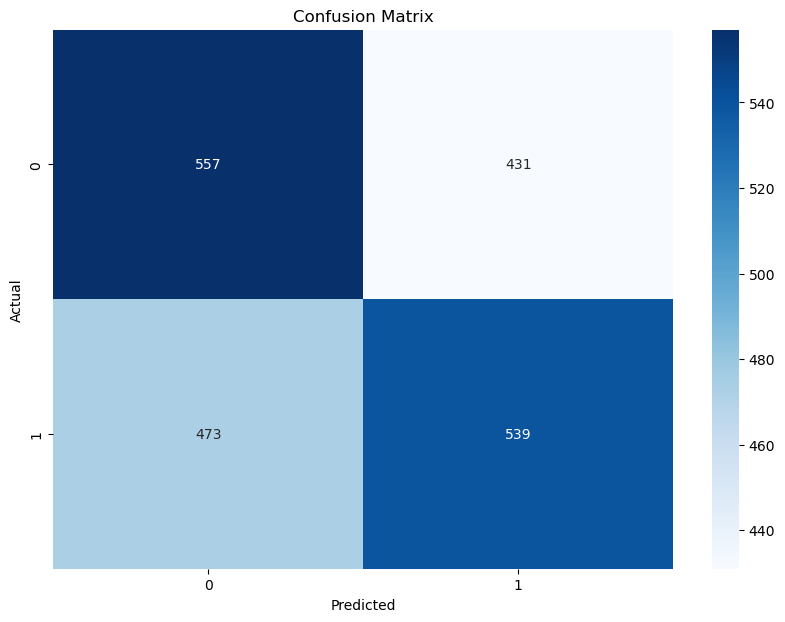

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
print('Confusion Matrix:')
print(val_conf_matrix)
plt.figure(figsize=(10, 7))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [26]:
#Loading and preprocessing the test data
test_images, test_labels = load_images(test_dir)  
test_images = test_images / 255.0

In [27]:
#Flattening the test images for the SVM input
n_test_samples, test_img_height, test_img_width, test_img_channels = test_images.shape
test_images_flat = test_images.reshape(n_test_samples, -1)
test_images_flat_scaled = scaler.transform(test_images_flat)

In [28]:
#Standardizing the test features¶
test_images_flat_scaled = scaler.transform(test_images_flat)
#Applying t-SNE for visualization on test data
# Determine a new perplexity value for the test data
test_perplexity = min(30, n_test_samples - 1)

# Create a new t-SNE instance for the test data

In [29]:
test_tsne = TSNE(n_components=2, perplexity=test_perplexity, random_state=42)
test_images_tsne = test_tsne.fit_transform(test_images_flat_scaled)

C:\Users\Hp\Downloads\mukul\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

C:\Users\Hp\Downloads\mukul\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [30]:
#Making predictions on the test set
y_test_pred = svm.predict(test_images_flat_scaled)

In [31]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [32]:
#Creating a DataFrame for Plotly¶
df_test_tsne = pd.DataFrame()
df_test_tsne['X'] = test_images_tsne[:, 0]
df_test_tsne['Y'] = test_images_tsne[:, 1]
df_test_tsne['Predicted Label'] = y_test_pred
df_test_tsne['Predicted Label'] = df_test_tsne['Predicted Label'].map({0: 'Cat', 1: 'Dog'})

In [33]:
test_predictions = pd.DataFrame({'Id': np.arange(1, n_test_samples + 1), 'Label': y_test_pred})
test_predictions['Label'] = test_predictions['Label'].map({0: 'Cat', 1: 'Dog'})
test_predictions.to_csv('cat-dog.csv', index=False)